# Import packages
---
---

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import warnings
warnings.filterwarnings('ignore')
import random

#from yellowbrick.regressor import prediction_error

# Get the Data
---

In [2]:
#df=pd.read_csv('/Users/reema/Downloads/hotel_booking.csv')
df = pd.read_csv('hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Take a Look at the Data Structure
---

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [63]:
#Numeric
numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [7]:
#Categorical
categorical = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64')].columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [8]:
df[numerical].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,341-568-0557,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [10]:
# Check classes for prediction
df['is_canceled'].value_counts()#(normalize=True)

0    75166
1    44224
Name: is_canceled, dtype: int64

In [11]:
# Check value counts for catogrical columns
for col in categorical:
    print(f'''Value count column {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count column hotel:
--------------------------------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count column arrival_date_month:
--------------------------------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count column meal:
--------------------------------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count column country:
--------------------------------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PLW        1
ATF        1
SMR        1
BFA        1
ASM        1
Name: country, Length: 177, dtype: int64

Value count column market_segment

In [12]:
# Check Duplicates
df.duplicated().sum()

0

In [13]:
#df.hist(bins=60, figsize=(20,15));

# Data Pre-Processing
---

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
df_clean = df.copy()

In [16]:
#Delete Irrelevant Features
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)

In [17]:
#Remove rows that have no children data
df_clean.dropna(subset=['children'], inplace=True)

In [18]:
#Change value company to 0 and 1
df_clean['company'] = df_clean['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['company'].value_counts()

0    112589
1      6797
Name: company, dtype: int64

In [19]:
#Change value agent to 0 and 1
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'].value_counts()

1    103048
0     16338
Name: agent, dtype: int64

In [20]:
#Fill NaN value in country with the value of mode
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)
df_clean['country'].value_counts()

PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PLW        1
ATF        1
SMR        1
BFA        1
ASM        1
Name: country, Length: 177, dtype: int64

In [21]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Handel incorrect value
---

ADR

In [22]:
df_clean['adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [23]:
df_clean[df_clean.adr < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,1,0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [24]:
df_clean.drop(df_clean[df_clean['adr'] < 0].index, inplace = True)

In [25]:
df_clean['adr'].describe()

count    119385.000000
mean        101.834447
std          50.533905
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Adults


In [26]:
df_clean['adults'].describe()

count    119385.000000
mean          1.856389
std           0.579263
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [27]:
df_clean.drop(df_clean[df_clean['adults']<1].index, inplace= True)

In [28]:
df_clean['adults'].describe()

count    118982.000000
mean          1.862677
std           0.570062
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

# Change Type

In [29]:
# Changing children to integer type: 
df_clean['children'] = df_clean['children'].astype(int)

# Changing reservation status date to datetime type: 
df_clean['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Changing agent to integer type: 
df_clean['agent'] = df_clean['agent'].astype(int)

# Changing company to integer type: 
df_clean['company'] = df_clean['company'].astype(int)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118982 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   stays_in_weekend_nights         118982 non-null  int64         
 8   stays_in_week_nights            118982 non-null  int64         
 9   adults                          118982 non-null  int64         
 10  children                        118982 non-null  int32  

# Feature Engineering
---

Total Stays


In [31]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

Total Guests

In [32]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

Kids

In [33]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']

Guest Location

In [34]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

International    70068
Local            48914
Name: guest_location, dtype: int64

In [35]:
# Delete 
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies'], axis = 1, inplace=True)

In [36]:
# check Duplicates
df_clean.duplicated().sum()

32013

In [37]:
# drop Duplicates
df_clean.drop_duplicates(inplace=True)

In [38]:
df_clean.duplicated().sum()

0

In [39]:
df_clean['is_canceled'].value_counts()

0    63050
1    23919
Name: is_canceled, dtype: int64

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86969 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86969 non-null  object        
 1   is_canceled                     86969 non-null  int64         
 2   lead_time                       86969 non-null  int64         
 3   arrival_date_year               86969 non-null  int64         
 4   arrival_date_month              86969 non-null  object        
 5   arrival_date_week_number        86969 non-null  int64         
 6   arrival_date_day_of_month       86969 non-null  int64         
 7   adults                          86969 non-null  int64         
 8   meal                            86969 non-null  object        
 9   country                         86969 non-null  object        
 10  market_segment                  86969 non-null  object        
 11  d

# Split Data
---

In [41]:
total_previous_cancellations = df_clean['previous_cancellations'].unique() 
total_previous_cancellations

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [42]:
#train/test split on randomly selected groups of previous_cancellations
np.random.seed(80)
total_previous_cancellations = df_clean['previous_cancellations'].unique() 
test_previous_cancellations = np.random.choice(total_previous_cancellations, size=int(total_previous_cancellations.shape[0] * .20))

In [43]:
df_train, df_test = df_clean[~df_clean['previous_cancellations'].isin(test_previous_cancellations)], df_clean[df_clean['previous_cancellations'].isin(test_previous_cancellations)]

In [44]:
#train/val split on randomly selected groups of previous_cancellations
total_train_previous_cancellations = df_train['previous_cancellations'].unique() 
val_previous_cancellations = np.random.choice(total_train_previous_cancellations, size=int(total_train_previous_cancellations.shape[0] * .25))

In [45]:
df_train, df_val = df_train[~df_train['previous_cancellations'].isin(val_previous_cancellations)], df_train[df_train['previous_cancellations'].isin(val_previous_cancellations)]

# ------------------------------------------

In [46]:
df_train['previous_cancellations'].unique()

array([ 0,  1, 25,  4, 24, 19,  5, 21, 11], dtype=int64)

In [47]:
df_test['previous_cancellations'].unique()

array([ 3, 14,  6], dtype=int64)

In [48]:
df_val['previous_cancellations'].unique()

array([ 2, 26, 13], dtype=int64)

# ------------------------------------------

In [49]:
df_train['is_canceled'].value_counts()

0    62913
1    23862
Name: is_canceled, dtype: int64

In [50]:
df_val['is_canceled'].value_counts()

0    77
1    38
Name: is_canceled, dtype: int64

In [51]:
df_test['is_canceled'].value_counts()

0    60
1    19
Name: is_canceled, dtype: int64

# Get Dummies 

In [52]:
df_train.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
adults                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                      int32
company             

In [53]:
df1=df1 = df_train.select_dtypes(exclude=['object']).copy()

In [54]:
df_obj_train=df_train.loc[:,['hotel','arrival_date_month','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]
           

In [55]:
df_obj_val=df_val.loc[:,['hotel','arrival_date_month','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]  

In [56]:
df_obj_test=df_test.loc[:,['hotel','arrival_date_month','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','guest_location']]  

In [57]:
df_dum_tr = pd.get_dummies(df_obj_train, drop_first=True)

df_train1 = pd.concat([df1, df_dum_tr], axis=1)
df_train1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
0,0,342,2015,27,1,2,0,0,0,3,...,0,0,0,0,0,1,0,1,0,1
1,0,737,2015,27,1,2,0,0,0,4,...,0,0,0,0,0,1,0,1,0,1


In [58]:
df_dum_val = pd.get_dummies(df_obj_val, drop_first=True)

df_val1 = pd.concat([df1, df_dum_val], axis=1)
df_val1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,deposit_type_Non Refund,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,guest_location_Local
0,0.0,342.0,2015.0,27.0,1.0,2.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,737.0,2015.0,27.0,1.0,2.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_dum_test = pd.get_dummies(df_obj_test, drop_first=True)

df_test1 = pd.concat([df1, df_dum_test], axis=1)
df_test1.head(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_B,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,deposit_type_Non Refund,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,guest_location_Local
0,0.0,342.0,2015.0,27.0,1.0,2.0,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,737.0,2015.0,27.0,1.0,2.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#sns.heatmap(df_clean.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


# EDA

In [68]:
# plt.figure(figsize=(15, 25))
# for i in range(0, len(numerical)):
#     plt.subplot(10, int(len(numerical)/9), i+1)
#     sns.distplot(df_clean[numerical[i]], color='gray')
#     plt.tight_layout()

In [ ]:
df_train1.shape

In [ ]:
df_val1.shape

In [ ]:
df_test1.shape

In [72]:
train_sample= df_train1[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled',
                           'assigned_room_type_K','assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable',
                           'customer_type_Group','customer_type_Transient','customer_type_Transient-Party',
                           'reservation_status_Check-Out','reservation_status_No-Show','guest_location_Local',
                           'hotel_Resort Hotel','market_segment_Complementary','market_segment_Corporate',
                           'market_segment_Direct','market_segment_Groups','market_segment_Offline TA/TO',
                           'market_segment_Online TA','distribution_channel_Direct','distribution_channel_GDS',
                           'distribution_channel_TA/TO','distribution_channel_Undefined','assigned_room_type_B',
                           'assigned_room_type_C','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F',
                           'assigned_room_type_G','assigned_room_type_H','assigned_room_type_I','assigned_room_type_K',
                           'assigned_room_type_L','deposit_type_Non Refund','deposit_type_Refundable','customer_type_Group',
                           'customer_type_Transient','customer_type_Transient-Party','reservation_status_Check-Out',
                           'reservation_status_No-Show'
                           ]]







val_sample = df_val1[['hotel_Resort Hotel','is_canceled','lead_time','previous_cancellations','distribution_channel_Direct',
                      'distribution_channel_TA/TO','market_segment_Complementary','market_segment_Corporate',
                      'market_segment_Direct',
                      'market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
                      'country_PRT','country_ITA','country_GBR','country_FRA','deposit_type_Non Refund',
                      'previous_bookings_not_canceled','customer_type_Group','customer_type_Transient',
                      'customer_type_Transient-Party','assigned_room_type_B','assigned_room_type_C',
                      'assigned_room_type_D','assigned_room_type_E','assigned_room_type_F','assigned_room_type_G',
                      'assigned_room_type_H'
                     ]]
    
                          

test_sample = df_test1[['is_canceled','lead_time','previous_cancellations','previous_bookings_not_canceled',
                        'hotel_Resort Hotel','country_PRT','market_segment_Direct',
                      'market_segment_Groups','market_segment_Offline TA/TO','market_segment_Online TA',
                        'market_segment_Corporate','distribution_channel_Direct','distribution_channel_TA/TO',
                        'assigned_room_type_B','assigned_room_type_D','assigned_room_type_E','assigned_room_type_F',
                        'assigned_room_type_G','deposit_type_Non Refund','reservation_status_Check-Out',
                        'reservation_status_No-Show','customer_type_Transient-Party']]
    
    
   

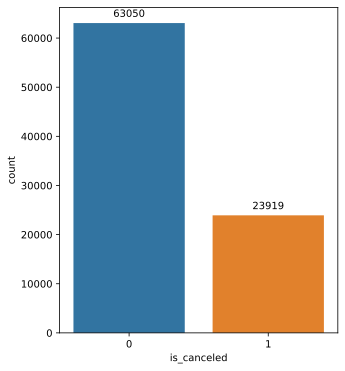

In [83]:
# Classes
plt.figure(figsize=(5, 6))
cancel_ax = sns.countplot(df_clean['is_canceled'])

for p in cancel_ax.patches:
    cancel_ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

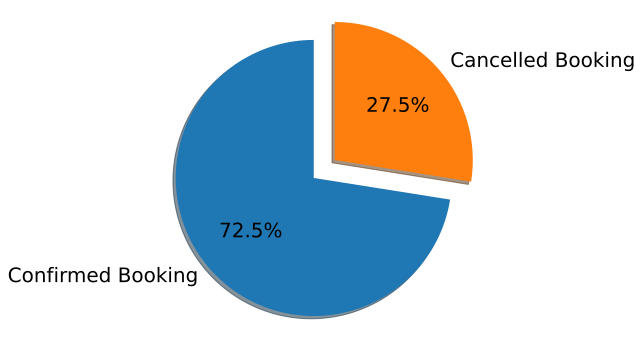

In [82]:
# Cancellation Rate
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_clean['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal'); 

---
## What is the month in which there were the most cancellations, and what is the month in which there were the least cancellations?

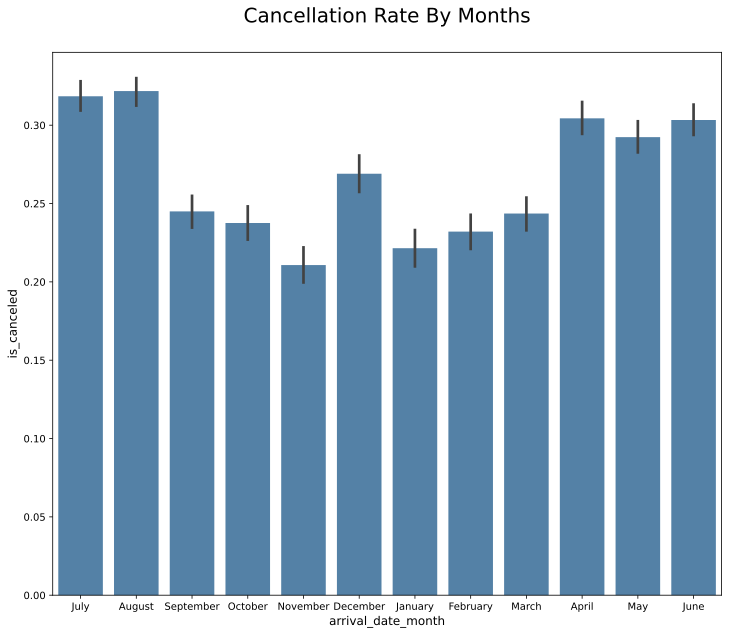

In [96]:
plt.figure(figsize=(12, 10))
sns.barplot(df_clean['arrival_date_month'], df_clean['is_canceled'], color='steelblue')

plt.xlabel('arrival_date_month', fontsize=12)
plt.ylabel('is_canceled', fontsize=12)
plt.title('Cancellation Rate By Months', fontsize=20, pad=30)
plt.show()